In [15]:
import pandas as pd
import os
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('2010.csv')

In [28]:
df.head()

,id,samplingPoint,samplingPointNotation,samplingPointLabel,sampleDateTime,determinandLabel,determinandDefinition,determinandNotation,resultQualifierNotation,result,codedResultInterpretationInterpretation,determinandUnitLabel,sampledMaterialTypeLabel,isComplianceSample,purposeLabel,easting,northing,Coordinates
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-011262,STEANE PARK THE MANOR HOUSE STW,2010-02-12T14:20:00,D Site Insp,Descriptive Site Inspection : Pass/Fail 1/0,7444,NaN,1.0,NaN,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),455510,239070,POINT (455510 239070)
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-011262,STEANE PARK THE MANOR HOUSE STW,2010-02-12T14:20:00,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",664,NaN,0.0,NaN,pres/nf,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),455510,239070,POINT (455510 239070)
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-011265,BLACKPIT FARM STW STOWE,2010-02-16T13:15:00,D Site Insp,Descriptive Site Inspection : Pass/Fail 1/0,7444,NaN,1.0,NaN,coded,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467660,239950,POINT (467660 239950)
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-011265,BLACKPIT FARM STW STOWE,2010-02-16T13:15:00,Oil & Grs Vs,"Visible oil or grease, significant trace: Pres...",664,NaN,0.0,NaN,pres/nf,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467660,239950,POINT (467660 239950)
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,AN-011396,BUCKINGHAM GOLF CLUB TINGEWICK RD.,2010-01-18T12:40:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,0.5,NaN,mg/l,FINAL SEWAGE EFFLUENT,True,COMPLIANCE AUDIT (PERMIT),467020,233400,POINT (467020 233400)


In [21]:
df['Coordinates'] = list(zip(df.easting, df.northing))

In [19]:
df.columns.values

array(['@id', 'sample.samplingPoint', 'sample.samplingPoint.notation',
       'sample.samplingPoint.label', 'sample.sampleDateTime',
       'determinand.label', 'determinand.definition',
       'determinand.notation', 'resultQualifier.notation', 'result',
       'codedResultInterpretation.interpretation',
       'determinand.unit.label', 'sample.sampledMaterialType.label',
       'sample.isComplianceSample', 'sample.purpose.label',
       'sample.samplingPoint.easting', 'sample.samplingPoint.northing'],
      dtype=object)

In [20]:
df.columns = ['id', 'samplingPoint', 'samplingPointNotation',
       'samplingPointLabel', 'sampleDateTime',
       'determinandLabel', 'determinandDefinition',
       'determinandNotation', 'resultQualifierNotation', 'result',
       'codedResultInterpretationInterpretation',
       'determinandUnitLabel', 'sampledMaterialTypeLabel',
       'isComplianceSample', 'purposeLabel',
       'easting', 'northing']

In [23]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [29]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [12]:
gdf.crs(epsg=4326)

NameError: name 'gdf' is not defined

In [36]:
print(gdf.head())

                                                  id  \
0  http://environment.data.gov.uk/water-quality/d...   
1  http://environment.data.gov.uk/water-quality/d...   
2  http://environment.data.gov.uk/water-quality/d...   
3  http://environment.data.gov.uk/water-quality/d...   
4  http://environment.data.gov.uk/water-quality/d...   

                                       samplingPoint samplingPointNotation  \
0  http://environment.data.gov.uk/water-quality/i...             AN-011262   
1  http://environment.data.gov.uk/water-quality/i...             AN-011262   
2  http://environment.data.gov.uk/water-quality/i...             AN-011265   
3  http://environment.data.gov.uk/water-quality/i...             AN-011265   
4  http://environment.data.gov.uk/water-quality/i...             AN-011396   

                   samplingPointLabel       sampleDateTime determinandLabel  \
0     STEANE PARK THE MANOR HOUSE STW  2010-02-12T14:20:00      D Site Insp   
1     STEANE PARK THE MANOR HOUSE ST

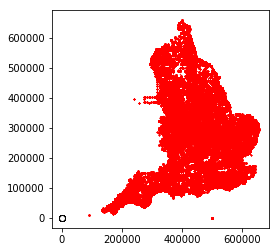

In [30]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

# We restrict to South America.
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red', marker='.', markersize=1)

plt.show()

In [31]:
gdf.crs = {'init': 'epsg:27700'}

In [35]:
gdf = gdf.to_crs(epsg=4326)

In [37]:
gdf.to_csv(r'EAcoords.csv')